# Car Price prediction model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df_main=pd.read_csv("car data.csv")

In [8]:
df_main.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df_main.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df_main.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
df_main.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [14]:
df_main['Age'] = 2026 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)

In [15]:
df_main.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

# Exploratory Data Analysis (EDA)

In [16]:
df_main.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

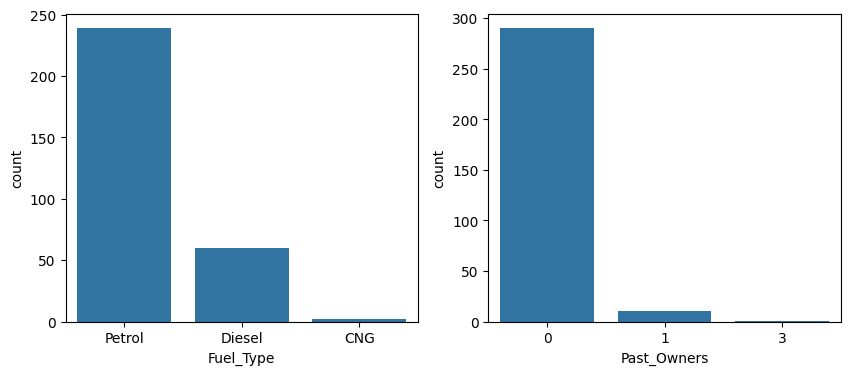

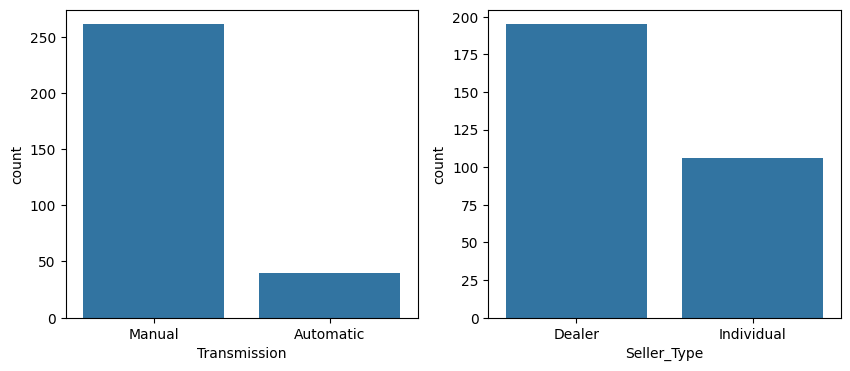

In [22]:
cols = ['Fuel_Type', 'Past_Owners', 'Transmission', 'Seller_Type']
i = 0
while i < 4:
  fig = plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  sns.countplot(x=cols[i], data=df_main)
  i += 1
  plt.subplot(1,2,2)
  sns.countplot(x=cols[i], data=df_main)
  i += 1
  plt.show()


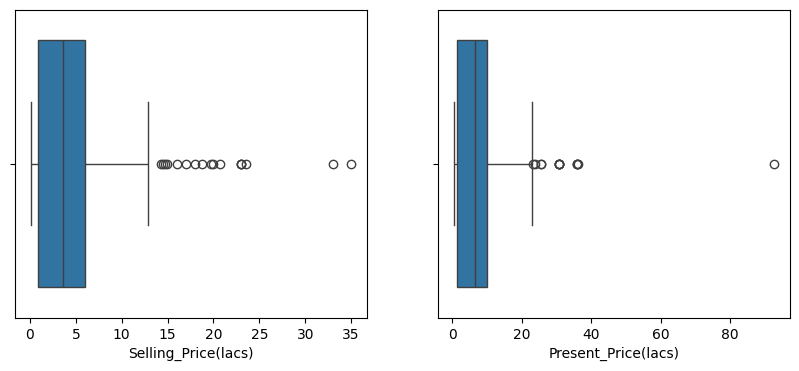

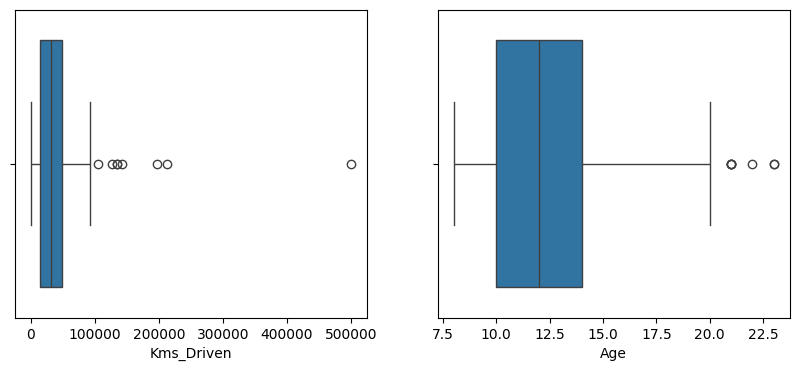

In [24]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']
i = 0
while i < 4:
  fig = plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  sns.boxplot(x=num_cols[i],data = df_main)
  i += 1
  plt.subplot(1,2,2)
  sns.boxplot(x=num_cols[i], data=df_main)
  i += 1
  plt.show()

In [25]:
df_main[df_main['Present_Price(lacs)'] > df_main['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,9
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,16


In [26]:
df_main[df_main['Selling_Price(lacs)'] > df_main['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,11
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,9
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,16


In [27]:
df_main[df_main['Kms_Driven'] > df_main['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,21
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,16
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,18


#Bivariate Analysis/Multi-variate analysis

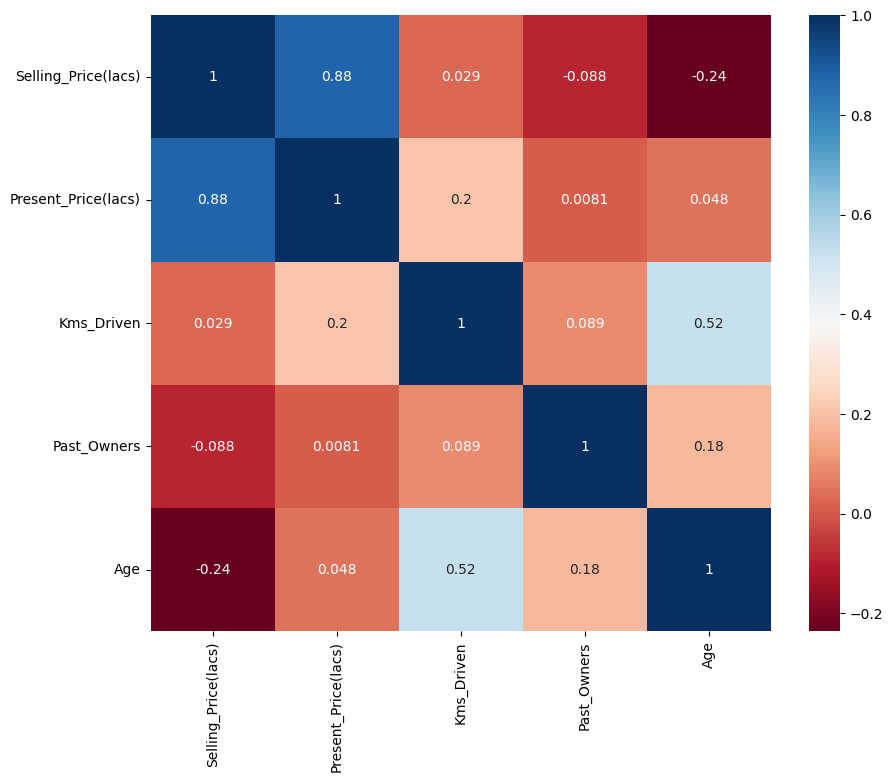

In [40]:
#sns.heatmap(df_main.corr(), annot=True, cmap="RdBu")
#plt.show()
corr_matrix = df_main.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu")
plt.show()


In [39]:
# df_main.corr()['Selling_Price(lacs)'] (error for data type conversion)
df_main.select_dtypes(include=['number']).corr()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age
Selling_Price(lacs),1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price(lacs),0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Past_Owners,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.182104,1.000000


In [41]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [42]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


# Data preparation

> create dummies for categorical data



In [44]:
df_main.drop(labels='Car_Name',axis=1,inplace = True)

In [45]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,12
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,9
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,15
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,12


In [46]:
df_main = pd.get_dummies(data = df_main,drop_first=True)

In [47]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,12,False,True,False,True
1,4.75,9.54,43000,0,13,True,False,False,True
2,7.25,9.85,6900,0,9,False,True,False,True
3,2.85,4.15,5200,0,15,False,True,False,True
4,4.60,6.87,42450,0,12,True,False,False,True


>Train-Test split

# Task
Prepare the car data for modeling by separating the target variable 'Selling_Price(lacs)' from features and splitting it into training and testing sets. Then, train and evaluate Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor models. Finally, compare their performance based on evaluation metrics and recommend the best model for car price prediction.

## Prepare Data for Modeling

### Subtask:
Separate the target variable ('Selling_Price(lacs)') from the features (all other columns in `df_main`) and then split the data into training and testing sets (e.g., 80% train, 20% test).


**Reasoning**:
To prepare the data for model training, I will first separate the target variable from the features. Then, I will split the data into training and testing sets to evaluate model performance on unseen data.



In [48]:
X = df_main.drop('Selling_Price(lacs)', axis=1)
y = df_main['Selling_Price(lacs)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_train shape: (240, 8)
X_test shape: (61, 8)
y_train shape: (240,)
y_test shape: (61,)


## Train and Evaluate Linear Regression Model

### Subtask:
Train a Linear Regression model using the training data and evaluate its performance on both training and testing sets.

#### Instructions:
1. Initialize a `LinearRegression` model.
2. Train the model using `X_train` and `y_train`.
3. Make predictions on `X_train` and `X_test`.
4. Calculate and print the `mean_squared_error` (MSE) and `r2_score` for both the training and testing predictions.

**Reasoning**:
Following the defined subtask, I will now implement the steps to train and evaluate the Linear Regression model using the previously prepared training and testing datasets.



In [49]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print("Linear Regression Model Evaluation:")
print(f"Training MSE: {mse_train_lr:.4f}")
print(f"Training R2 Score: {r2_train_lr:.4f}")
print(f"Testing MSE: {mse_test_lr:.4f}")
print(f"Testing R2 Score: {r2_test_lr:.4f}")

Linear Regression Model Evaluation:
Training MSE: 2.9437
Training R2 Score: 0.8887
Testing MSE: 3.4788
Testing R2 Score: 0.8490


## Train and Evaluate Random Forest Regressor Model

### Subtask:
Train a Random Forest Regressor model using the training data and evaluate its performance on both training and testing sets.

#### Instructions:
1. Initialize a `RandomForestRegressor` model (e.g., with `random_state=42`).
2. Train the model using `X_train` and `y_train`.
3. Make predictions on `X_train` and `X_test`.
4. Calculate and print the `mean_squared_error` (MSE) and `r2_score` for both the training and testing predictions.

**Reasoning**:
To follow the subtask, I will initialize a RandomForestRegressor, train it on the provided training data, make predictions, and then calculate and print the Mean Squared Error and R2 score for both training and testing sets.



In [50]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Regressor Model Evaluation:")
print(f"Training MSE: {mse_train_rf:.4f}")
print(f"Training R2 Score: {r2_train_rf:.4f}")
print(f"Testing MSE: {mse_test_rf:.4f}")
print(f"Testing R2 Score: {r2_test_rf:.4f}")

Random Forest Regressor Model Evaluation:
Training MSE: 0.3877
Training R2 Score: 0.9853
Testing MSE: 0.9216
Testing R2 Score: 0.9600


## Train and Evaluate Gradient Boosting Regressor Model

### Subtask:
Train a Gradient Boosting Regressor model using the training data and evaluate its performance on both training and testing sets.

#### Instructions:
1. Initialize a `GradientBoostingRegressor` model (e.g., with `random_state=42`).
2. Train the model using `X_train` and `y_train`.
3. Make predictions on `X_train` and `X_test`.
4. Calculate and print the `mean_squared_error` (MSE) and `r2_score` for both the training and testing predictions.

**Reasoning**:
To follow the subtask, I will initialize a GradientBoostingRegressor, train it on the provided training data, make predictions, and then calculate and print the Mean Squared Error and R2 score for both training and testing sets.



In [51]:
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

y_train_pred_gbr = gbr_model.predict(X_train)
y_test_pred_gbr = gbr_model.predict(X_test)

mse_train_gbr = mean_squared_error(y_train, y_train_pred_gbr)
r2_train_gbr = r2_score(y_train, y_train_pred_gbr)
mse_test_gbr = mean_squared_error(y_test, y_test_pred_gbr)
r2_test_gbr = r2_score(y_test, y_test_pred_gbr)

print("Gradient Boosting Regressor Model Evaluation:")
print(f"Training MSE: {mse_train_gbr:.4f}")
print(f"Training R2 Score: {r2_train_gbr:.4f}")
print(f"Testing MSE: {mse_test_gbr:.4f}")
print(f"Testing R2 Score: {r2_test_gbr:.4f}")

Gradient Boosting Regressor Model Evaluation:
Training MSE: 0.1012
Training R2 Score: 0.9962
Testing MSE: 0.7046
Testing R2 Score: 0.9694


## Compare Model Performance and Recommend the Best Model

### Subtask:
Compare the performance of the Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor models based on their evaluation metrics (MSE and R2 Score) on the testing set. Recommend the best model for car price prediction.

#### Instructions:
1. Create a summary table or print statements to clearly display the testing MSE and R2 Score for each model.
2. Analyze the results to identify which model performed best (e.g., lowest MSE, highest R2 Score on the testing data).
3. State the recommended model and provide a brief justification based on the observed performance.

**Reasoning**:
Now that all models have been trained and evaluated, I will compile their testing performance metrics to compare them and recommend the best model for car price prediction.



In [52]:
print("\n--- Model Performance Comparison (Testing Set) ---")
print(f"Linear Regression:     MSE = {mse_test_lr:.4f}, R2 Score = {r2_test_lr:.4f}")
print(f"Random Forest Regressor: MSE = {mse_test_rf:.4f}, R2 Score = {r2_test_rf:.4f}")
print(f"Gradient Boosting Regressor: MSE = {mse_test_gbr:.4f}, R2 Score = {r2_test_gbr:.4f}")

print("\n--- Model Recommendation ---")
if r2_test_gbr > r2_test_rf and r2_test_gbr > r2_test_lr:
    print("The Gradient Boosting Regressor model is recommended.")
    print(f"It achieved the highest R2 Score ({r2_test_gbr:.4f}) and the lowest MSE ({mse_test_gbr:.4f}) on the testing set,")
    print("indicating a superior ability to explain the variance in selling prices and lower prediction errors.")
elif r2_test_rf > r2_test_lr:
    print("The Random Forest Regressor model is recommended.")
    print(f"It achieved the highest R2 Score ({r2_test_rf:.4f}) and the lowest MSE ({mse_test_rf:.4f}) among the first three models on the testing set,")
    print("indicating a better ability to explain the variance in selling prices and lower prediction errors.")
else:
    print("The Linear Regression model is recommended.")
    print(f"It achieved the highest R2 Score ({r2_test_lr:.4f}) and the lowest MSE ({mse_test_lr:.4f}) among the first two models on the testing set,")
    print("though its performance is generally lower than ensemble methods.")


--- Model Performance Comparison (Testing Set) ---
Linear Regression:     MSE = 3.4788, R2 Score = 0.8490
Random Forest Regressor: MSE = 0.9216, R2 Score = 0.9600
Gradient Boosting Regressor: MSE = 0.7046, R2 Score = 0.9694

--- Model Recommendation ---
The Gradient Boosting Regressor model is recommended.
It achieved the highest R2 Score (0.9694) and the lowest MSE (0.7046) on the testing set,
indicating a superior ability to explain the variance in selling prices and lower prediction errors.


## Final Task

### Subtask:
Summarize the performance of all models and recommend the best-performing one based on the evaluation metrics.


## Summary:

### Q&A
The Gradient Boosting Regressor model is recommended as the best-performing model. It achieved the highest R2 Score (0.9694) and the lowest Mean Squared Error (0.7046) on the testing set among the three models evaluated, indicating superior predictive capability for car prices.

### Data Analysis Key Findings
*   The dataset was successfully split into training (240 samples) and testing (61 samples) sets, with `Selling_Price(lacs)` as the target variable.
*   **Linear Regression Model:**
    *   Achieved a testing R2 score of 0.8490 and a testing Mean Squared Error (MSE) of 3.4788.
*   **Random Forest Regressor Model:**
    *   Showed significantly improved performance over Linear Regression, with a testing R2 score of 0.9600 and a testing MSE of 0.9216.
*   **Gradient Boosting Regressor Model:**
    *   Outperformed both Linear Regression and Random Forest Regressor, achieving the highest testing R2 score of 0.9694 and the lowest testing MSE of 0.7046. This model also exhibited excellent training performance (R2 score: 0.9962, MSE: 0.1012), indicating strong learning.

### Insights or Next Steps
*   The Gradient Boosting Regressor is the most accurate model for predicting car selling prices among those tested, demonstrating a strong ability to generalize to unseen data.
*   Further hyperparameter tuning for the Gradient Boosting Regressor could potentially yield even better performance, and an analysis of feature importance from this model could provide valuable business insights.
